# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
pd.__version__

'1.0.1'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [4]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [5]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [6]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [7]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [8]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [9]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [9]:
len(movies)

244914

### List all Batman movies ever made

In [ ]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [ ]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [ ]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [ ]:
Harry_Potter=movies[movies['title'].str.contains("Harry Potter", case=False)]
Harry_Potter_df=Harry_Potter.sort_values('year',ascending=False)
print(Harry_Potter_df)

                                               title  year
143147  Harry Potter and the Deathly Hallows: Part 2  2011
152831  Harry Potter and the Deathly Hallows: Part 1  2010
109213        Harry Potter and the Half-Blood Prince  2009
50581      Harry Potter and the Order of the Phoenix  2007
187926           Harry Potter and the Goblet of Fire  2005
61957       Harry Potter and the Prisoner of Azkaban  2004
82791        Harry Potter and the Chamber of Secrets  2002
223087         Harry Potter and the Sorcerer's Stone  2001


### How many movies were made in the year 2017?

In [ ]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [ ]:
len(movies[movies['year']==2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [ ]:
FROM2015to2018=len(movies[(movies['year']>=2000) & (movies['year']<=2018)])
print(FROM2015to2018)

114070


### Section I - Q4: How many movies are titled "Hamlet"?

In [ ]:
Hamlet=movies[movies['title'].str.contains("Hamlet", case=False)]
print(len(Hamlet))

57


### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [ ]:
Hamlet_2000=Hamlet[Hamlet['year']>=2000]
Hamlet_2000_df=Hamlet_2000.sort_values('year',ascending=True)
print(Hamlet_2000_df)

                                          title  year
55639                                    Hamlet  2000
55525                    Hamlet in the Hamptons  2002
137905                                 Hamlet_X  2003
218468                                 Hamlet X  2004
40045                               Hamlet (II)  2005
152920          Dogg's Hamlet, Cahoot's Macbeth  2005
200246  The Tragedy of Hamlet Prince of Denmark  2007
176528                              Hamlet (II)  2007
156899                             Hamlet (III)  2007
52408                 Hamlet the Vampire Slayer  2008
141237                                 Hamlet 2  2008
191734                           Kitchen Hamlet  2009
1931                                     Hamlet  2009
227953                                   Hamlet  2011
220674                     Hamlet Demonstration  2011
51236                            Hamlet Unbound  2012
17833                             Zombie Hamlet  2012
186136                      

### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [ ]:
Inception=cast[cast['title'].str.contains("Inception",case=False)]
role=Inception.fillna({'n':0})
support_cast=role[role['n']==0]


print("number of supporting cast in the Inception: "+str(len(support_cast)))

number of supporting cast in the Inception: 36


### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [ ]:
main_cast=role[(role['n']>0) & (role['n']<4)]
print("number of main cast: "+ str(len(main_cast)))

number of main cast: 3


### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [ ]:
casts=role[role['n']!=0]
top_ten=casts.sort_values('n',ascending=True)
print(top_ten.iloc[0:10])


             title  year                  name     type        character     n
590576   Inception  2010     Leonardo DiCaprio    actor             Cobb   1.0
859993   Inception  2010  Joseph Gordon-Levitt    actor           Arthur   2.0
3387147  Inception  2010            Ellen Page  actress          Ariadne   3.0
940923   Inception  2010             Tom Hardy    actor            Eames   4.0
2406531  Inception  2010          Ken Watanabe    actor            Saito   5.0
1876301  Inception  2010            Dileep Rao    actor            Yusuf   6.0
1615709  Inception  2010        Cillian Murphy    actor   Robert Fischer   7.0
183937   Inception  2010          Tom Berenger    actor         Browning   8.0
2765969  Inception  2010      Marion Cotillard  actress              Mal   9.0
1826027  Inception  2010    Pete Postlethwaite    actor  Maurice Fischer  10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [ ]:
M=cast[cast['character']=="Albus Dumbledore"]
list_AD=[]
for K in M['title']:
    list_AD.append(K)
print(list_AD)



['Epic Movie', 'Harry Potter and the Goblet of Fire', 'Harry Potter and the Order of the Phoenix', 'Harry Potter and the Prisoner of Azkaban', 'Harry Potter and the Chamber of Secrets', "Harry Potter and the Sorcerer's Stone", 'Ultimate Hero Project', 'Potter']


In [ ]:
list_actors=[]
actors=M.drop_duplicates(subset=['name'])
for A in actors['name']:
    list_actors.append(A)
print(list_actors)

['Dane Farwell', 'Michael Gambon', 'Richard Harris', "George (X) O'Connor", 'Timothy Tedmanson']


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [ ]:
KR=cast[cast['name']=="Keanu Reeves"]
print(len(KR['character']))

62


In [ ]:
KR_role=cast[(cast['year']>1999) & (cast['n']==1)]
print(KR_role['character'])

102        TV Reporter #1
138                  Deon
144                  Malo
145                Marcus
146                  Rich
                ...      
3785795            M?nire
3785893            Denise
3785961        Kadife Ana
3786008         Stephanie
3786011         Katharine
Name: character, Length: 60568, dtype: object


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [ ]:
temp= cast[(cast['type'].isin(["actor","actress"])) & (1950<=cast['year']) & (cast['year']<=1960)]
roles2=temp.dropna(subset=['character'])
print(len(roles2['character']))

234635


In [ ]:
temp1= cast[(cast['type'].isin(["actor","actress"])) & (2007<=cast['year']) & (cast['year']<=2017)]
roles3=temp1.dropna(subset=['character'])
print(len(roles3['character']))

1452413


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [ ]:
leading_role=cast[(cast['n'].isin([1,2])) & (cast['year']>=2000)]
print(len(leading_role))

117332


In [ ]:
print(len(cast)-len(leading_role))

3668844


In [ ]:

print(len(role[(role['n']==0) & (role['year']>=2000)]))

36


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [ ]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Temptation              12
The Outsider            12
Maya                    12
Honeymoon               11
Othello                 11
The Three Musketeers    11
Freedom                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

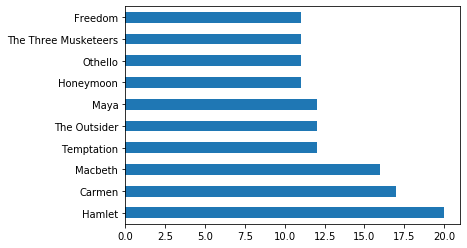

In [ ]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [ ]:
movies_2000=release_dates[(release_dates['year']>=2000) & (release_dates['year']<2010)]

year_most_movie=movies_2000.groupby(by=["year"]).title.count()
topthree=year_most_movie.sort_values(ascending=False).iloc[0:3]
print(topthree.index.tolist())

[2009, 2008, 2007]


### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

         title
year          
1890.0       1
1900.0       1
1910.0     843
1920.0   12619
1930.0   16299
1940.0   28404
1950.0   25752
1960.0   34596
1970.0   30461
1980.0   36243
1990.0   35651
2000.0   86677
2010.0  121673
2020.0   50267
2120.0       1


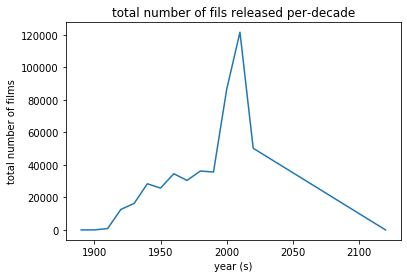

In [ ]:
release_dates_3=release_dates.copy()
#release_dates["year"]=release_dates["year"]*100
release_dates_3["year"]=release_dates_3["year"]/10
release_dates_3["year"]=release_dates_3["year"].round()*10
movies_per_decade=release_dates_3.groupby(by=["year"]).title.count()

movies_per_decade_df=movies_per_decade.to_frame()
print(movies_per_decade_df)
plt.plot(movies_per_decade_df)
plt.xlabel('year (s)')
plt.ylabel('total number of films')
plt.title("total number of fils released per-decade")
plt.show()


### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [ ]:
top_10_char=cast['character'].value_counts()
print(top_10_char[0:10].index.tolist())

['Himself', 'Dancer', 'Extra', 'Reporter', 'Student', 'Doctor', 'Party Guest', 'Policeman', 'Nurse', 'Bartender']


In [ ]:
top_10_herself=cast[cast['character']=="Herself"]
top_10_herself_2=top_10_herself['name'].value_counts()
print(top_10_herself_2[0:10].index.tolist())

['Queen Elizabeth II', 'Joyce Brothers', 'Luisa Horga', 'Mar?a Luisa (V) Mart?n', 'Margaret Thatcher', 'Hillary Clinton', 'Oprah Winfrey', 'Mar?a Isabel (III) Mart?n', 'Rekha', 'In?s J. Southern']


In [ ]:
top_10_himself=cast[cast['character']=="Himself"]
top_10_himself_2=top_10_himself['name'].value_counts()
print(top_10_himself_2[0:10].index.tolist())

['Adolf Hitler', 'Richard Nixon', 'Ronald Reagan', 'John F. Kennedy', 'George W. Bush', 'Winston Churchill', 'Martin Luther King', 'Ron Jeremy', 'Bill Clinton', 'Benito Mussolini']


### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [ ]:
zombie_roles=cast[cast['character'].str.startswith('Zombie')]
zombie_roles_2=zombie_roles.sort_values(by='character')

print(zombie_roles_2['character'][0:10].tolist())

['Zombie', 'Zombie', 'Zombie', 'Zombie', 'Zombie', 'Zombie', 'Zombie', 'Zombie', 'Zombie', 'Zombie']


In [ ]:
Police_roles=cast[cast['character'].str.startswith('Police')]
Police_roles_2=Police_roles.sort_values(by='character')

print(Police_roles_2['character'][0:10].tolist())

['Police', 'Police', 'Police', 'Police', 'Police', 'Police', 'Police', 'Police', 'Police', 'Police']


### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

    year  character
0   1985          1
1   1986          3
2   1988          4
3   1989          2
4   1990          2
5   1991          3
6   1992          1
7   1993          4
8   1994          1
9   1995          2
10  1996          2
11  1997          2
12  1999          3
13  2000          3
14  2001          2
15  2003          3
16  2005          3
17  2006          2
18  2008          2
19  2009          1
20  2010          1
21  2012          1
22  2013          2
23  2014          1
24  2015          1
25  2016          5
26  2017          3
27  2018          1
28  2019          1


Text(0, 0.5, 'character')

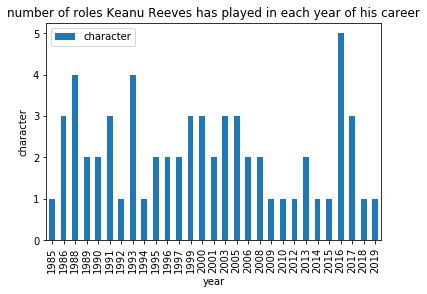

In [ ]:
KR_roles=cast[cast['name']=="Keanu Reeves"]
KR_roles_2=KR_roles.groupby(by="year").character.count()
KR_roles_2=KR_roles_2.to_frame().reset_index()
print(KR_roles_2)
PLOT=KR_roles_2.plot.bar(x="year",y="character", title="number of roles Keanu Reeves has played in each year of his career")
PLOT.set_xlabel("year")
PLOT.set_ylabel("character")



### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


    year     n
0   1985   1.0
1   1986  17.0
2   1988  14.0
3   1989   9.0
4   1990   8.0
5   1991   5.0
6   1992   4.0
7   1993  19.0
8   1994   1.0
9   1995   2.0
10  1996   2.0
11  1997   3.0
12  1999  85.0
13  2000   7.0
14  2001   2.0
15  2003  95.0
16  2005  39.0
17  2006   5.0
18  2008   2.0
19  2009  16.0
20  2010   1.0
21  2012   0.0
22  2013   3.0
23  2014   1.0
24  2015   1.0
25  2016  46.0
26  2017  12.0
27  2018   1.0
28  2019   0.0


Text(0, 0.5, 'cast position')

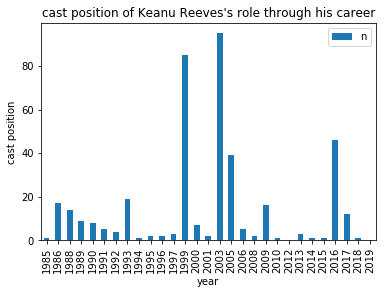

In [ ]:
KR_cast_pos=cast[cast['name']=="Keanu Reeves"]
KR_cast_pos_2=KR_cast_pos.groupby(by="year").n.sum()
KR_cast_pos_2=KR_cast_pos_2.to_frame().reset_index()
print(KR_cast_pos_2)
PLOT2=KR_cast_pos_2.plot.bar(x="year",y="n", title="cast position of Keanu Reeves's role through his career")
PLOT2.set_xlabel("year")
PLOT2.set_ylabel("cast position")


### Section II - Q7: Plot the number of "Hamlet" films made by each decade

         title    year  country       date
147638  Hamlet  1910.0      USA 1910-02-02
147639  Hamlet  1910.0  Denmark 1911-02-27
147640  Hamlet  1910.0       UK 1911-03-18
147641  Hamlet  1910.0      USA 1911-04-15
147642  Hamlet  1920.0  Finland 1921-01-10
...        ...     ...      ...        ...
147716  Hamlet  2010.0      USA 2014-01-10
147717  Hamlet  2020.0       UK 2015-03-23
147718  Hamlet  2020.0   Canada 2016-04-23
147719  Hamlet  2020.0      USA 2016-04-24
147720  Hamlet  2020.0       UK 2017-04-28

[83 rows x 4 columns]
      year   title
0   1890.0       1
1   1900.0       1
2   1910.0     843
3   1920.0   12619
4   1930.0   16299
5   1940.0   28404
6   1950.0   25752
7   1960.0   34596
8   1970.0   30461
9   1980.0   36243
10  1990.0   35651
11  2000.0   86677
12  2010.0  121673
13  2020.0   50267
14  2120.0       1
      year  title_x  title_y
8   1890.0      NaN        1
9   1900.0      NaN        1
0   1910.0      4.0      843
1   1920.0      5.0    12619
10  1930.0  

Text(0, 0.5, '# of Hamlet')

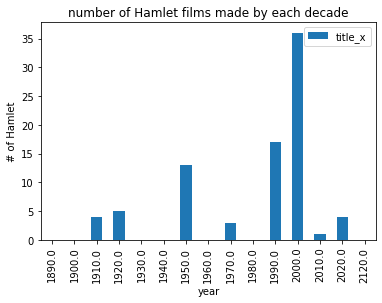

In [ ]:
release_dates_4=release_dates_3.copy()
release_dates_5=release_dates_4[release_dates_4['title']=='Hamlet']
print(release_dates_5)
H_per_decade=release_dates_5.groupby(by=["year"]).title.count()
H_per_decade_2=H_per_decade.to_frame()
movies_per_decade_df_2=movies_per_decade_df.copy()
movies_per_decade_df_3=movies_per_decade_df_2.reset_index()
print(movies_per_decade_df_3)
x=H_per_decade_2.merge(movies_per_decade_df_3,how='outer', on='year')
k=x.sort_values('year')
print(k)
PLOT3=k.plot.bar(x="year",y="title_x", title="number of Hamlet films made by each decade")
PLOT3.set_xlabel("year")
PLOT3.set_ylabel("# of Hamlet")

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [ ]:

actor_actress=cast[(cast['type']=='actor') |(cast['type']=='actress')]
actor_actress_2=actor_actress[(actor_actress['n']<3) & (cast['year']<=1969)&(cast['year']>=1960)]
#
print(len(actor_actress_2))


22618


In [ ]:
actor_actress_2000=actor_actress[(actor_actress['n']<3) & (cast['year']<=2009)&(cast['year']>=2000)]
#
print(len(actor_actress_2000))


51084


### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [20]:
fk=cast[cast['name']=='Frank Oz']
fk_2=fk.groupby(by=['year','title']).character.count()
fk_3=fk_2.to_frame()
fk_4=fk_3.reset_index()
print(fk_4[fk_4['character']!=1]['title'])

        


0                         The Muppet Movie
3           An American Werewolf in London
4                   The Great Muppet Caper
5                         The Dark Crystal
9               The Muppets Take Manhattan
10                        Follow That Bird
14              The Muppet Christmas Carol
15                  Muppet Treasure Island
17                      Muppets from Space
19    The Adventures of Elmo in Grouchland
Name: title, dtype: object


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

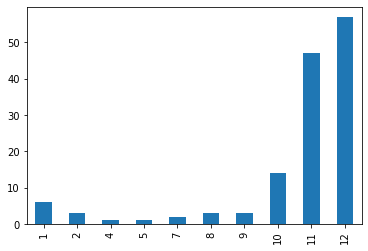

In [23]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

In [ ]:
Summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
Summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

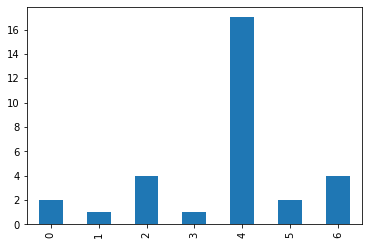

In [22]:
Action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
Action.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [26]:
temp=cast[(cast['n']<=2) & (cast['name']=='Keanu Reeves') ]
temp2=release_dates[release_dates['country']=='USA'].sort_values('date')
temp3=temp.merge(temp2,how='outer',on=['year','title'])
print(temp3.sort_values('date').dropna()['title'])

18                         River's Edge
28                     The Night Before
3      Bill & Ted's Excellent Adventure
32                  Tune in Tomorrow...
17                          Point Break
2            Bill & Ted's Bogus Journey
13                        Little Buddha
20                                Speed
11                      Johnny Mnemonic
1                  A Walk in the Clouds
4                        Chain Reaction
6                     Feeling Minnesota
26    The Last Time I Committed Suicide
24                 The Devil's Advocate
27                           The Matrix
30                     The Replacements
22                       Sweet November
7                             Hard Ball
5                           Constantine
25                       The Lake House
21                         Street Kings
23        The Day the Earth Stood Still
0                              47 Ronin
9                             John Wick
12                          Knock Knock


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

                                title  year          name   type  \
0                            47 Ronin  2013  Keanu Reeves  actor   
1                A Walk in the Clouds  1995  Keanu Reeves  actor   
2          Bill & Ted's Bogus Journey  1991  Keanu Reeves  actor   
3    Bill & Ted's Excellent Adventure  1989  Keanu Reeves  actor   
4                      Chain Reaction  1996  Keanu Reeves  actor   
5                         Constantine  2005  Keanu Reeves  actor   
6                   Feeling Minnesota  1996  Keanu Reeves  actor   
7                           Hard Ball  2001  Keanu Reeves  actor   
9                           John Wick  2014  Keanu Reeves  actor   
10               John Wick: Chapter 2  2017  Keanu Reeves  actor   
11                    Johnny Mnemonic  1995  Keanu Reeves  actor   
12                        Knock Knock  2015  Keanu Reeves  actor   
13                      Little Buddha  1993  Keanu Reeves  actor   
17                        Point Break  1991  Kea

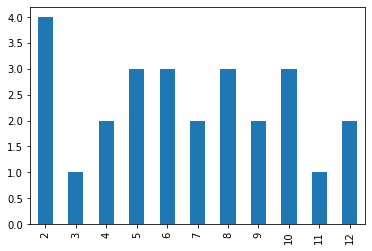

In [29]:
temp4=temp3.dropna()
temp4.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

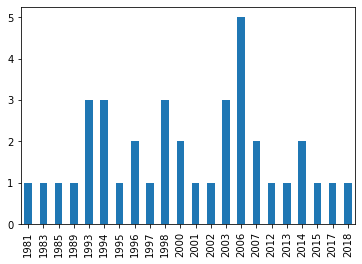

In [30]:
IM=cast[cast['name']=='Ian McKellen']
IM_2=release_dates[release_dates['country']=='USA']
IM_merged=IM.merge(IM_2,how='outer',on=['year','title'])
IM_3=IM_merged.dropna()
IM_3.date.dt.year.value_counts().sort_index().plot(kind='bar')
